# Composition

In what follows, we will implement transformation methods for sampling continuous distributions.

**Example 2.13.** As stated in notes, we aim at comparing two procedures. First,

* Sample $X \sim \mathcal{N}(x;\mu,\sigma^2)$,
* Sample $Y | X = x \sim \mathcal{N}(y; x, 1)$

and comparing resulting $Y$ samples to
* $Y \sim p(y) = \mathcal{N}(y; \mu, \sigma^2 + 1)$.

By analytical results, they must match.


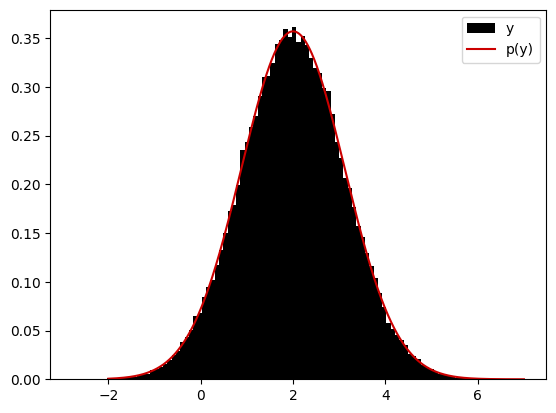

In [7]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12)

mu = 2
sigma = 0.5

N = 100000
x = np.zeros(N)
y = np.zeros(N)

# We use rng.normal for this
# Note that rng.normal takes the standard deviation as the second argument
# You can use Box-M\"uller transform to sample Gaussians too

for i in range(N):
    x[i] = rng.normal(mu, sigma, 1)
    y[i] = rng.normal(x[i], 1, 1)

def marginal_y(z, mu, sigma):
    return np.exp(-0.5 * (z-mu)**2/(sigma**2 + 1)) / np.sqrt(2 * np.pi * (sigma**2 + 1))

yy = np.linspace(-2, 7, 1000)
plt.hist(y, bins=100, density=True, label='y', color='black')
plt.plot(yy, marginal_y(yy, mu, sigma), label='p(y)', color=[0.8, 0, 0])
plt.legend()
plt.show()

**Example 2.14** Let us look at the simulation of a linear regression model.

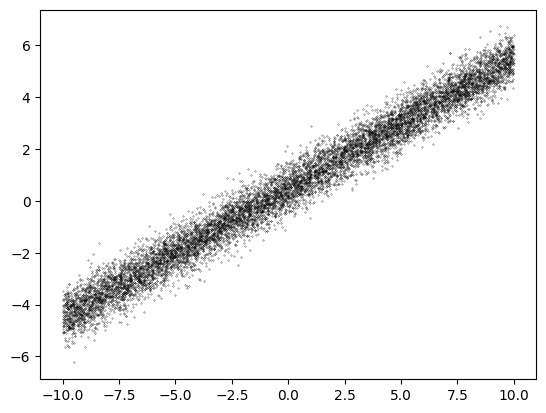

In [9]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12)

n = 10000

x = rng.uniform(-10, 10, n)

a = 0.5
b = 0.5
sigma_0 = 0.5 # this is the standard deviation, not the variance!

y = a * x + b + np.random.normal(0, sigma_0, n)

plt.scatter(x, y, color='k', alpha=1, s=0.05)
plt.show()
# plt.pause(10)